<a href="https://colab.research.google.com/github/tishhapatel/Advance-DataScience-and-ML/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv("dbscan.csv")
df.head()


,DATE,USAGE_kWh,COST_INR,HOUR,DAY_OF_WEEK,MONTH
0,2025-11-01 00:00:00,2.423,15.51,0,5,11
1,2025-11-01 01:00:00,2.205,13.03,1,5,11
2,2025-11-01 02:00:00,2.631,16.90,2,5,11
3,2025-11-01 03:00:00,2.984,18.48,3,5,11
4,2025-11-01 04:00:00,2.887,19.02,4,5,11


In [5]:
features = ["USAGE_kWh", "COST_INR"]
X = df[features].dropna().values


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

df = df.loc[df[features].dropna().index].copy()
df["Cluster"] = labels
df.head()


,DATE,USAGE_kWh,COST_INR,HOUR,DAY_OF_WEEK,MONTH,Cluster
0,2025-11-01 00:00:00,2.423,15.51,0,5,11,0
1,2025-11-01 01:00:00,2.205,13.03,1,5,11,0
2,2025-11-01 02:00:00,2.631,16.90,2,5,11,0
3,2025-11-01 03:00:00,2.984,18.48,3,5,11,0
4,2025-11-01 04:00:00,2.887,19.02,4,5,11,0


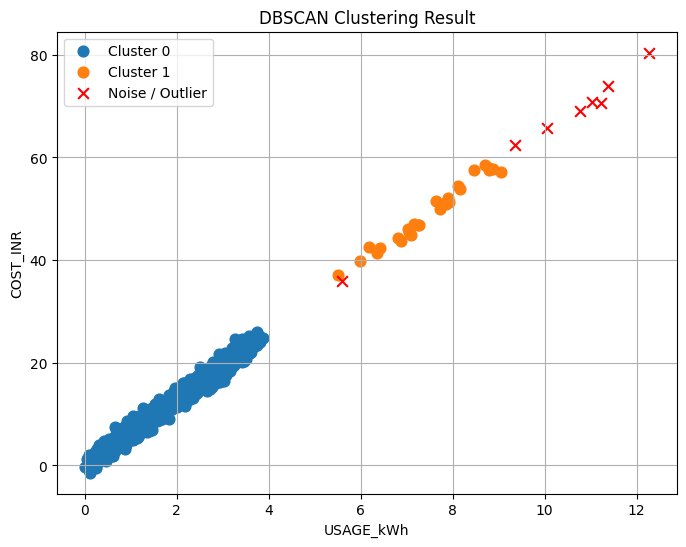

In [8]:
plt.figure(figsize=(8,6))

unique_labels = set(labels)

for lab in unique_labels:
    mask = (labels == lab)

    if lab == -1:
        plt.scatter(X[mask, 0], X[mask, 1], c="red", marker="x", s=60, label="Noise / Outlier")
    else:
        plt.scatter(X[mask, 0], X[mask, 1], s=60, label=f"Cluster {lab}")

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("DBSCAN Clustering Result")
plt.legend()
plt.grid(True)
plt.show()


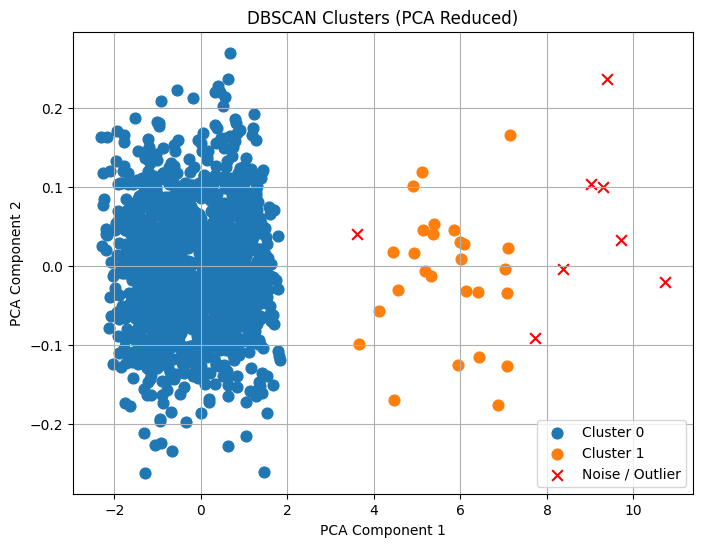

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
unique_labels = set(labels)

for lab in unique_labels:
    mask = (labels == lab)

    if lab == -1:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c="red", marker="x", s=60, label="Noise / Outlier")
    else:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=60, label=f"Cluster {lab}")

plt.title("DBSCAN Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("✅ Number of clusters:", n_clusters)
print("⚠️ Number of noise/outliers:", n_noise)

print("\nCluster count:")
print(df["Cluster"].value_counts())


✅ Number of clusters: 2
⚠️ Number of noise/outliers: 8

Cluster count:
Cluster
 0    1405
 1      27
-1       8
Name: count, dtype: int64


In [11]:
anomalies = df[df["Cluster"] == -1]
anomalies.head()


,DATE,USAGE_kWh,COST_INR,HOUR,DAY_OF_WEEK,MONTH,Cluster
113,2025-11-05 17:00:00,9.367,62.36,17,2,11,-1
219,2025-11-10 03:00:00,12.265,80.45,3,0,11,-1
364,2025-11-16 04:00:00,11.032,70.88,4,6,11,-1
852,2025-12-06 12:00:00,11.369,73.92,12,5,12,-1
1121,2025-12-17 17:00:00,5.588,35.97,17,2,12,-1


In [12]:
anomalies.to_csv("dbscan_anomalies.csv", index=False)
print("Saved anomalies to dbscan_anomalies.csv")


Saved anomalies to dbscan_anomalies.csv
